# Credit Card Approval Prediction Project

## Introduction
A trustworthy customer is more likely to pay on time, lowering the risk of default and the bank's losses. The bank can improve its overall financial performance by making informed decisions about who to approve for credit by accurately identifying good clients. A large number of trustworthy clients can also help the bank's reputation and draw in more clients.
The decision is made using the application data in addition to the Credit Bureau Score, such as the FICO Score in the US or the CIBIL Score in India, and other internal information on the applicants. Additionally, the banks are rapidly taking a lot of outside data into account to enhance the caliber of credit judgements.
### Aim: 
- Performing EDA and necessary feature engineering step to clean and modify the data. 
- Comparing different machine learning models for prediction of health insurance cost.

### Importing Libraries

In [279]:
import os
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from scipy import stats
import plotly.express as px
import missingno as msno

### Reading datasets

In [280]:
cc1=pd.read_csv("Credit_card.csv")
cc2=pd.read_csv("Credit_card_label.csv")

 # Exploratory data analysis

In [281]:
cc1.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [282]:
cc1.rename(columns = {'Propert_Owner':'Property_Owner','GENDER':'Gender','CHILDREN':'Children','EDUCATION':'Education','EMAIL_ID':'Email_ID'}, inplace = True)

In [283]:
cc1.shape

(1548, 18)

In [284]:
cc2.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [285]:
cc2.shape

(1548, 2)

In [286]:
# Merging 2 tables using inner join.
original_cc = pd.merge(cc1,cc2, on ="Ind_ID",how="inner")

In [287]:
original_cc.tail(10)

,Ind_ID,Gender,Car_Owner,Property_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,Email_ID,Type_Occupation,Family_Members,label
1538,5125816,F,Y,N,0,450000.0,Pensioner,Higher education,Married,House / apartment,-19783.0,-5521,1,1,1,0,Managers,2,0
1539,5149946,F,N,Y,0,180000.0,Working,Higher education,Married,House / apartment,-22228.0,-686,1,1,1,0,High skill tech staff,2,0
1540,5024049,F,Y,Y,1,144000.0,Working,Higher education,Married,House / apartment,-12903.0,-2924,1,0,0,0,Accountants,3,0
1541,5117065,F,N,Y,2,225000.0,Working,Higher education,Married,House / apartment,NaN,-1648,1,1,1,0,Accountants,4,0
1542,5118268,M,Y,N,1,360000.0,State servant,Secondary / secondary special,Married,House / apartment,-11294.0,-3536,1,0,1,0,Drivers,3,0
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0
1547,5053790,F,Y,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16601.0,-2859,1,0,0,0,NaN,2,0


By seeing the dataset , I found out that it may contain duplicates observations.

In [288]:
# Creating a copy of the dataset
cc=original_cc.copy()

In [289]:
cc.shape

(1548, 19)

Originally, There are 1548 observations and 19 variables.

In [290]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   Gender           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Property_Owner   1548 non-null   object 
 4   Children         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   Education        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  Email_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [291]:
# converting some integer variables to categorical variables.
cc[['Mobile_phone','Work_Phone','Phone','Email_ID']] = cc[['Mobile_phone','Work_Phone','Phone','Email_ID']].astype('object')
cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   Gender           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Property_Owner   1548 non-null   object 
 4   Children         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   Education        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   object 
 13  Work_Phone       1548 non-null   object 
 14  Phone            1548 non-null   object 
 15  Email_ID         1548 non-null   object 
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [292]:
#Seeing numerical columns in detail.
cc.describe()

,Ind_ID,Children,Annual_income,Birthday_count,Employed_days,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,15.000000,1.000000


In [293]:
cc=cc.drop (columns=['Ind_ID']) # As this column is not useful for data exploration.

In [294]:
cc.duplicated().sum()

162

There are 162 duplicate observations present in the dataset.

In [295]:
# Dropping the duplicate data.
cc.drop_duplicates(inplace=True)

In [296]:
cc.shape

(1386, 18)

See, Originally we had 1548 observations and now after removing duplicate observations, we have 1386 unique observations.

In [297]:
cc.reset_index(inplace=True)  # Reseting the index after dropping the dupicates.

In [298]:
cc.drop(columns=['index'],inplace=True)

In [299]:
cc.sample(5)

,Gender,Car_Owner,Property_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,Email_ID,Type_Occupation,Family_Members,label
505,F,N,N,1,108000.0,Working,Secondary / secondary special,Separated,House / apartment,-14349.0,-4082,1,0,1,0,NaN,2,0
1092,M,Y,N,1,202500.0,Commercial associate,Higher education,Married,With parents,-9956.0,-444,1,0,0,0,Managers,3,0
1052,M,N,Y,0,315000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-17995.0,-4034,1,0,0,0,Managers,2,0
705,M,N,Y,0,135000.0,State servant,Secondary / secondary special,Married,Rented apartment,-10448.0,-2323,1,1,0,1,NaN,2,0
1257,F,N,Y,0,165600.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21383.0,365243,1,0,1,0,NaN,1,0


### Making new column 'age' and 'employed_years' from column 'birthday_count' and 'Employed_days' respectively.

In [300]:
cc['age']=(cc['Birthday_count']//365)*(-1)

In [301]:
cc['employed_years']=(cc['Employed_days']//365)*(-1)

In [302]:
# Dropping unwanted columns.
cc.drop(columns=['Birthday_count'],inplace=True)
cc.drop(columns=['Employed_days'],inplace=True)

In [303]:
cc.loc[cc['employed_years']<0,'employed_years']=0

In [304]:
cc.sample(5)

,Gender,Car_Owner,Property_Owner,Children,Annual_income,Type_Income,Education,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,Email_ID,Type_Occupation,Family_Members,label,age,employed_years
647,F,N,Y,0,121500.0,Pensioner,Higher education,Widow,House / apartment,1,0,0,0,NaN,1,0,67.0,0
1264,M,Y,Y,1,112500.0,Working,Higher education,Married,House / apartment,1,0,0,1,Accountants,3,0,33.0,2
308,F,N,Y,0,90000.0,Working,Secondary / secondary special,Separated,House / apartment,1,0,0,0,NaN,1,0,53.0,10
559,F,Y,N,1,67500.0,State servant,Secondary / secondary special,Married,House / apartment,1,0,0,0,Core staff,3,0,42.0,4
801,M,Y,Y,0,247500.0,State servant,Secondary / secondary special,Civil marriage,House / apartment,1,0,0,0,High skill tech staff,2,0,33.0,5


### Checking Null Values.

In [305]:
cc.isnull().sum()

Gender               7
Car_Owner            0
Property_Owner       0
Children             0
Annual_income       23
Type_Income          0
Education            0
Marital_status       0
Housing_type         0
Mobile_phone         0
Work_Phone           0
Phone                0
Email_ID             0
Type_Occupation    438
Family_Members       0
label                0
age                 22
employed_years       0
dtype: int64

In [306]:
cc.nunique()

Gender               2
Car_Owner            2
Property_Owner       2
Children             6
Annual_income      115
Type_Income          4
Education            5
Marital_status       5
Housing_type         6
Mobile_phone         1
Work_Phone           2
Phone                2
Email_ID             2
Type_Occupation     18
Family_Members       7
label                2
age                 48
employed_years      39
dtype: int64

As their are many null values(missing values) under occupation column, I am replacing it with 'other' keyword.

As their is only 1 unique value under Mobile_phone, so we will drop that column from the data set.

In [307]:
cc.Type_Occupation=cc.Type_Occupation.fillna('other')
cc.drop(columns=['Mobile_phone'], inplace=True)

## DATA Visualization

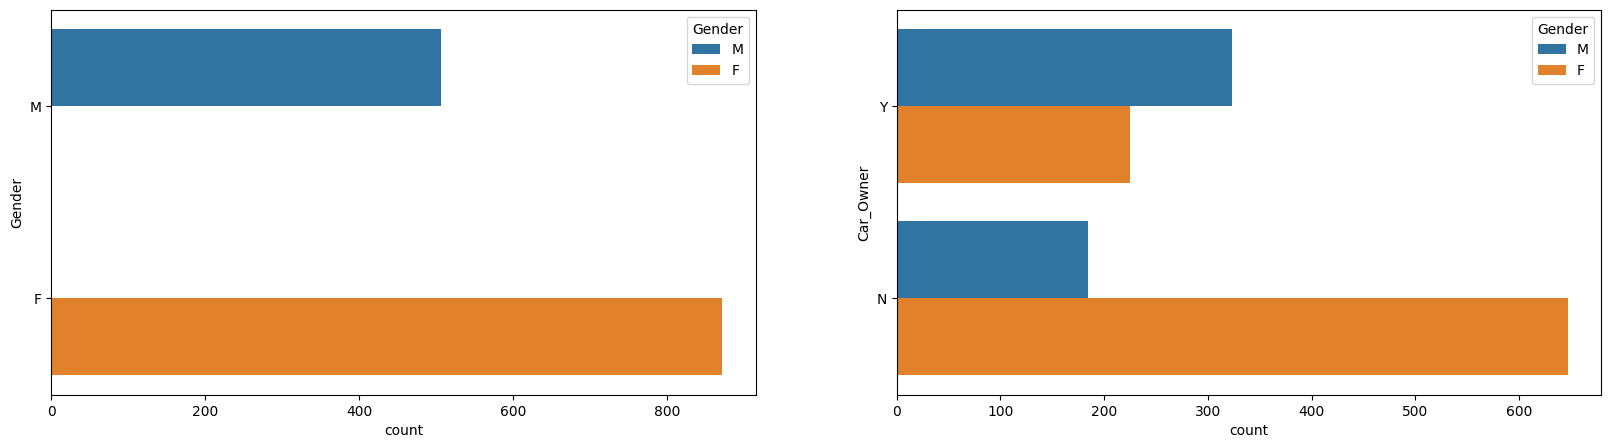

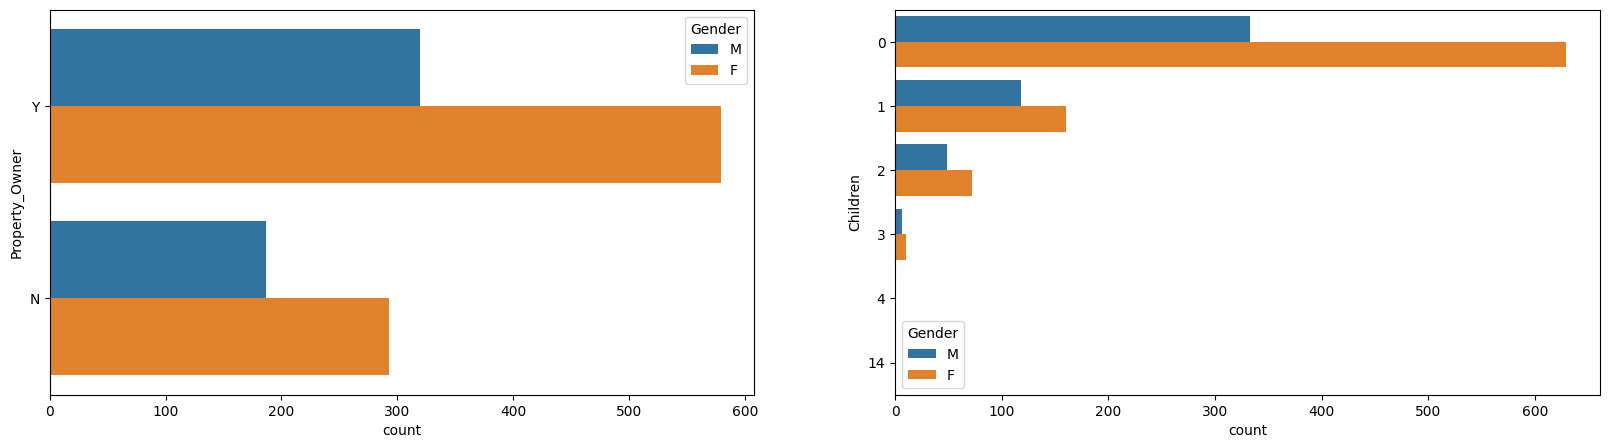

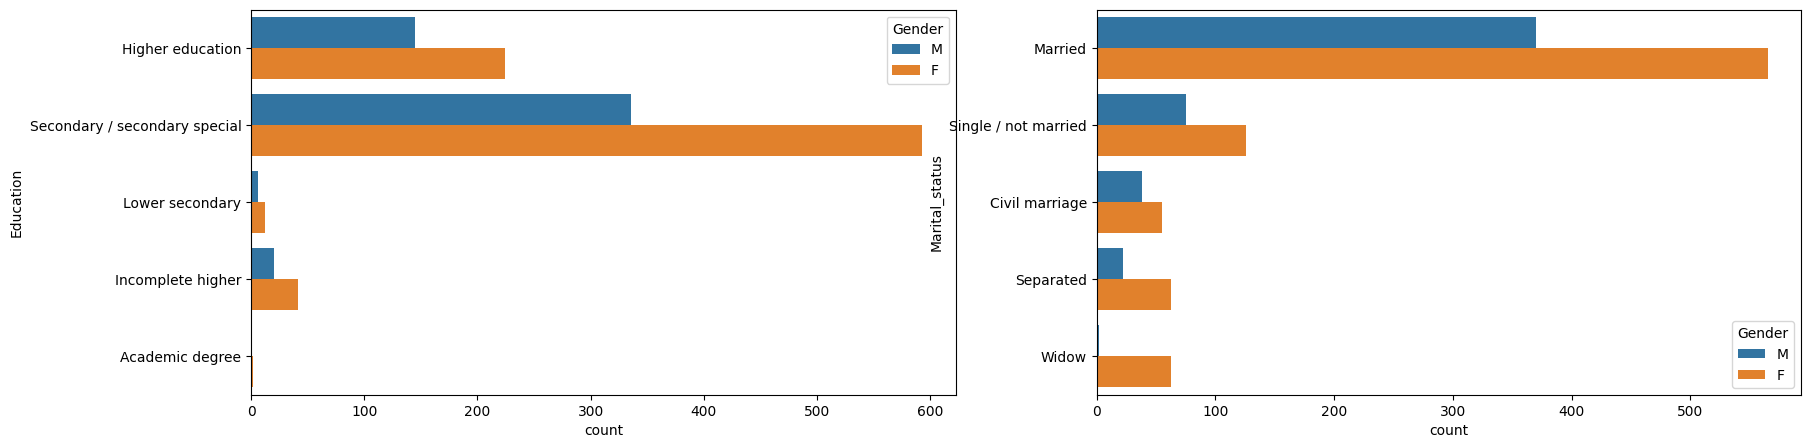

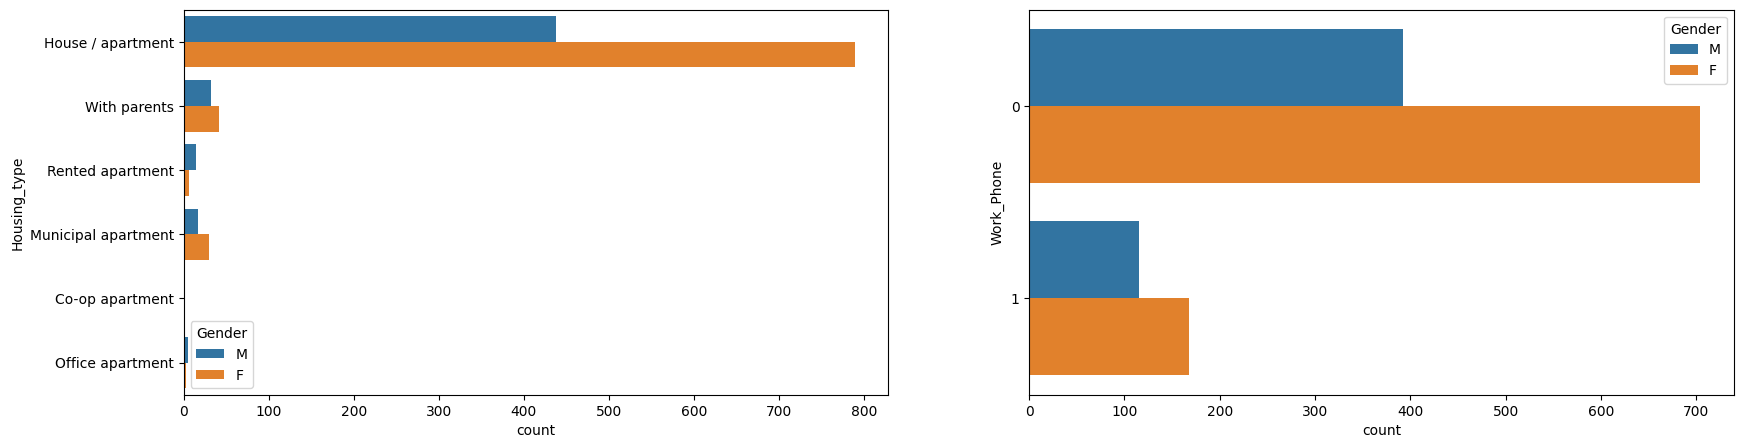

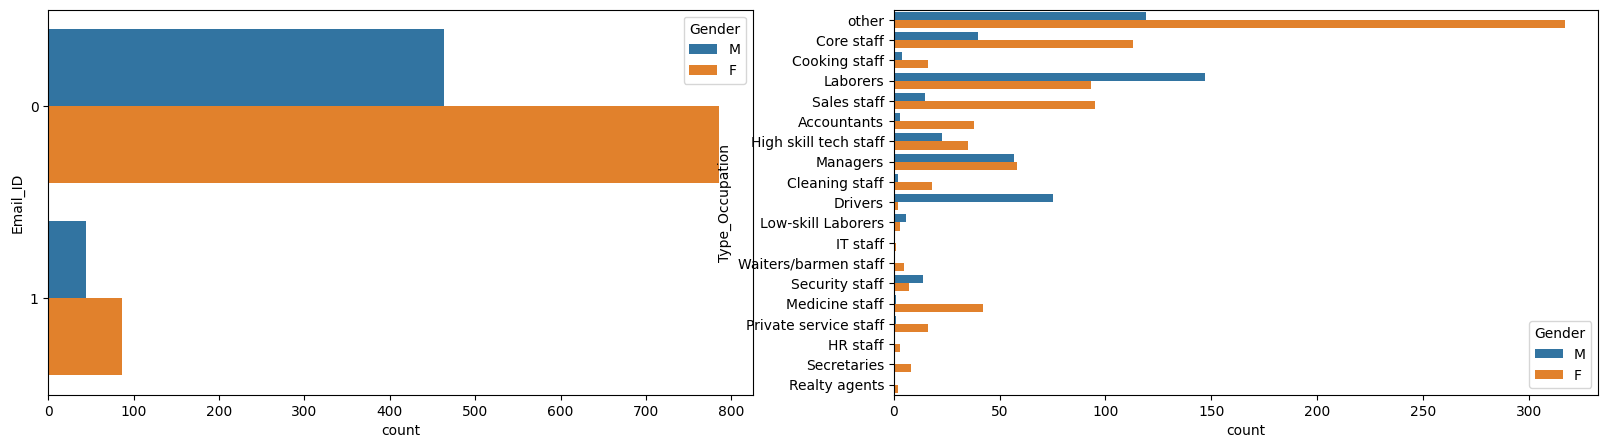

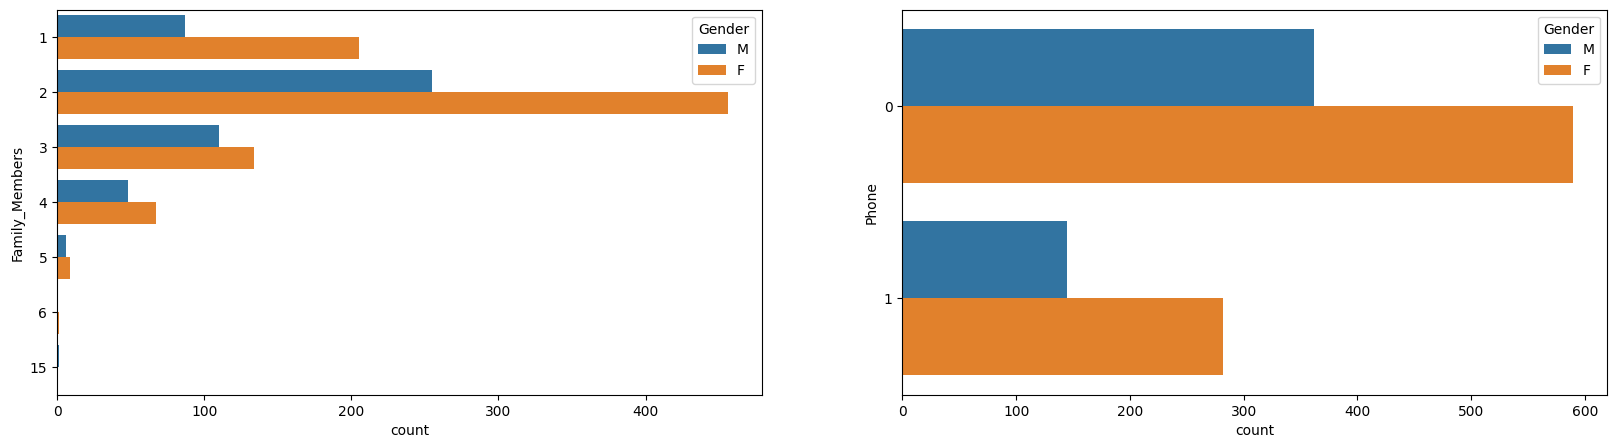

In [308]:
fig, ax = plt.subplots(1,2,figsize=(20, 5))
sns.countplot(y='Gender', data=cc,ax=ax[0],hue= 'Gender')
sns.countplot(y='Car_Owner', data=cc,ax=ax[1],hue= 'Gender')
plt.show()
fig, ax = plt.subplots(1,2,figsize=(20, 5))
sns.countplot(y='Property_Owner', data=cc,ax=ax[0],hue= 'Gender')
sns.countplot(y='Children', data=cc,ax=ax[1],hue= 'Gender')
plt.show()
fig, ax = plt.subplots(1,2,figsize=(20, 5))
sns.countplot(y='Education', data=cc,ax=ax[0],hue= 'Gender')
sns.countplot(y='Marital_status', data=cc,ax=ax[1],hue= 'Gender')
plt.show()
fig, ax = plt.subplots(1,2,figsize=(20, 5))
sns.countplot(y='Housing_type', data=cc,ax=ax[0],hue= 'Gender')
sns.countplot(y='Work_Phone', data=cc,ax=ax[1],hue= 'Gender')
plt.show()
fig, ax = plt.subplots(1,2,figsize=(20, 5))
sns.countplot(y='Email_ID', data=cc,ax=ax[0],hue= 'Gender')
sns.countplot(y='Type_Occupation', data=cc,ax=ax[1],hue= 'Gender')
plt.show()
fig, ax = plt.subplots(1,2,figsize=(20, 5))
sns.countplot(y='Family_Members', data=cc,ax=ax[0],hue= 'Gender')
sns.countplot(y='Phone', data=cc,ax=ax[1],hue= 'Gender')
plt.show()

<AxesSubplot: xlabel='age', ylabel='Annual_income'>

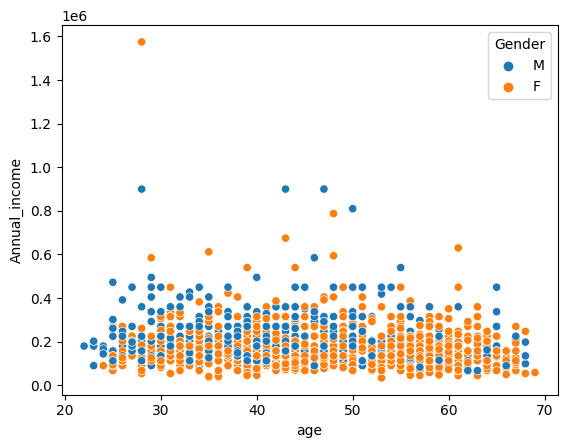

In [309]:
figure.figsize=(20, 5)
sns.scatterplot(cc,x='age',y='Annual_income',hue='Gender')


There is not much variation in Annual_income as the age increases.

In [310]:
fig = px.pie(cc, names='Gender', title='Gender distribution',width=500,height=500)
fig.show()

62.9 % are female and 36.6% are male among the customers.

In [311]:
fig = px.pie(cc, names='Marital_status', title='No of Customers by marital Status',width=600,height=600)
fig.show()

In [312]:
fig = px.pie(cc, names='Education', title='No of Customers by Education',width=600,height=600)
fig.show()

In [313]:
fig = px.pie(cc, names='Type_Income', title='No of Customers by Income type',width=600,height=600)
fig.show()

In [314]:
fig = px.pie(cc, names='Housing_type', title='No of Customers by Housing type',width=600,height=600)
fig.show()

In [315]:
fig = px.pie(cc, names='Children', title='No of Children',width=600,height=600)
fig.show()

<AxesSubplot: xlabel='count', ylabel='Type_Occupation'>

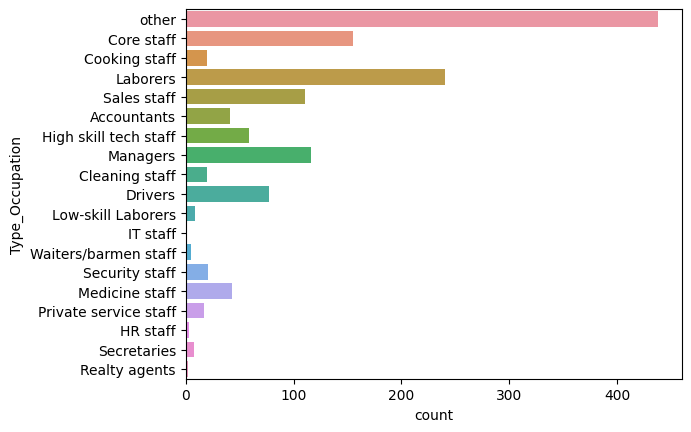

In [316]:
sns.countplot(y='Type_Occupation', data=cc)

<AxesSubplot: xlabel='count', ylabel='Housing_type'>

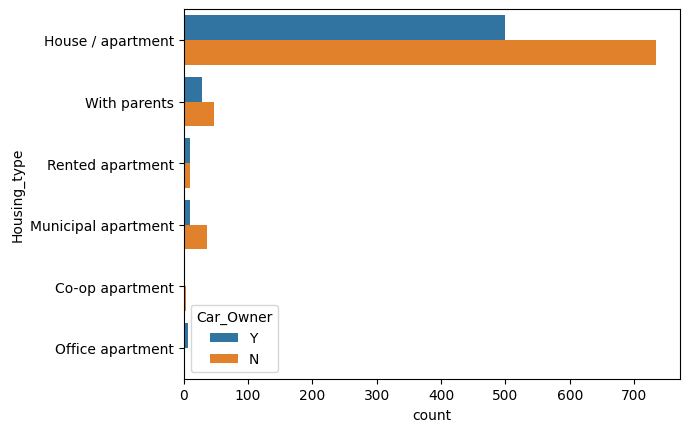

In [317]:
sns.countplot(y='Housing_type', data=cc,hue= 'Car_Owner')

In [318]:
#Checking null record in percentages
cc.isnull().sum()/ len(cc) * 100

Gender             0.505051
Car_Owner          0.000000
Property_Owner     0.000000
Children           0.000000
Annual_income      1.659452
Type_Income        0.000000
Education          0.000000
Marital_status     0.000000
Housing_type       0.000000
Work_Phone         0.000000
Phone              0.000000
Email_ID           0.000000
Type_Occupation    0.000000
Family_Members     0.000000
label              0.000000
age                1.587302
employed_years     0.000000
dtype: float64

In [319]:
cc.shape

(1386, 17)

# Doing KNN Imputation for missing values

In [320]:
# Doing ordinal encoding for ordinal columns.
from sklearn.preprocessing import OrdinalEncoder
Or_enc = OrdinalEncoder()
cc[['Education']] = Or_enc.fit_transform(cc[['Education']])

In [321]:
# doing categorical(dummies) encoding for nominal columns.
cc=pd.get_dummies(cc, columns=['Gender','Car_Owner','Property_Owner','Type_Income','Marital_status','Housing_type','Type_Occupation'],drop_first=True)

In [322]:
# To avoid data leakage from outcome variable splitting the data set
Independent = cc.drop('label',axis=1)
Independent.head()

,Children,Annual_income,Education,Work_Phone,Phone,Email_ID,Family_Members,age,employed_years,Gender_M,...,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff,Type_Occupation_other
0,0,180000.0,1.0,0,0,0,2,52.0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,315000.0,1.0,1,1,0,2,38.0,2,0,...,0,0,0,0,0,0,0,0,0,1
2,0,315000.0,1.0,1,1,0,2,NaN,2,0,...,0,0,0,0,0,0,0,0,0,1
3,0,NaN,1.0,1,1,0,2,38.0,2,0,...,0,0,0,0,0,0,0,0,0,1
4,0,315000.0,1.0,1,1,0,2,38.0,2,0,...,0,0,0,0,0,0,0,0,0,1


In [323]:
Dependent = cc['label'] # target variable
Dependent.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [324]:
# Imputation using KNN
from fancyimpute import KNN
knn_imputer = KNN()
Independent_knn = Independent.copy(deep=True)
Independent_knn.iloc[:, :] = knn_imputer.fit_transform(Independent_knn)

Imputing row 1/1386 with 0 missing, elapsed time: 0.253
Imputing row 101/1386 with 0 missing, elapsed time: 0.254
Imputing row 201/1386 with 0 missing, elapsed time: 0.254
Imputing row 301/1386 with 0 missing, elapsed time: 0.254
Imputing row 401/1386 with 0 missing, elapsed time: 0.254
Imputing row 501/1386 with 0 missing, elapsed time: 0.254
Imputing row 601/1386 with 0 missing, elapsed time: 0.255
Imputing row 701/1386 with 0 missing, elapsed time: 0.255
Imputing row 801/1386 with 0 missing, elapsed time: 0.255
Imputing row 901/1386 with 0 missing, elapsed time: 0.255
Imputing row 1001/1386 with 0 missing, elapsed time: 0.255
Imputing row 1101/1386 with 0 missing, elapsed time: 0.256
Imputing row 1201/1386 with 0 missing, elapsed time: 0.256
Imputing row 1301/1386 with 0 missing, elapsed time: 0.256


C:\Users\prate\AppData\Local\Temp\ipykernel_21264\2857701596.py:5: FutureWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



In [325]:
ccc = pd.concat([Independent_knn, Dependent], axis=1) # concatenating independent and dependent variable
ccc.head(10)

,Children,Annual_income,Education,Work_Phone,Phone,Email_ID,Family_Members,age,employed_years,Gender_M,...,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff,Type_Occupation_other,label
0,0.0,180000.000000,1.0,0.0,0.0,0.0,2.0,52.000000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,0.0,315000.000000,1.0,1.0,1.0,0.0,2.0,38.000000,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,0.0,315000.000000,1.0,1.0,1.0,0.0,2.0,38.000113,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,0.0,314999.080016,1.0,1.0,1.0,0.0,2.0,38.000000,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,0.0,315000.000000,1.0,1.0,1.0,0.0,2.0,38.000000,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
5,0.0,180000.000000,4.0,0.0,0.0,0.0,2.0,61.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
6,1.0,450000.000000,4.0,0.0,1.0,1.0,3.0,50.000000,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,1.0,450000.000000,4.0,0.0,1.0,1.0,3.0,50.000000,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8,1.0,450000.000000,4.0,0.0,1.0,1.0,1.0,50.000000,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9,0.0,90000.000000,4.0,1.0,1.0,0.0,2.0,52.000000,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [326]:
ccc.columns

Index(['Children', 'Annual_income', 'Education', 'Work_Phone', 'Phone',
       'Email_ID', 'Family_Members', 'age', 'employed_years', 'Gender_M',
       'Car_Owner_Y', 'Property_Owner_Y', 'Type_Income_Pensioner',
       'Type_Income_State servant', 'Type_Income_Working',
       'Marital_status_Married', 'Marital_status_Separated',
       'Marital_status_Single / not married', 'Marital_status_Widow',
       'Housing_type_House / apartment', 'Housing_type_Municipal apartment',
       'Housing_type_Office apartment', 'Housing_type_Rented apartment',
       'Housing_type_With parents', 'Type_Occupation_Cleaning staff',
       'Type_Occupation_Cooking staff', 'Type_Occupation_Core staff',
       'Type_Occupation_Drivers', 'Type_Occupation_HR staff',
       'Type_Occupation_High skill tech staff', 'Type_Occupation_IT staff',
       'Type_Occupation_Laborers', 'Type_Occupation_Low-skill Laborers',
       'Type_Occupation_Managers', 'Type_Occupation_Medicine staff',
       'Type_Occupation_Pri

In [327]:
ccc.isnull().sum()

Children                                 0
Annual_income                            0
Education                                0
Work_Phone                               0
Phone                                    0
Email_ID                                 0
Family_Members                           0
age                                      0
employed_years                           0
Gender_M                                 0
Car_Owner_Y                              0
Property_Owner_Y                         0
Type_Income_Pensioner                    0
Type_Income_State servant                0
Type_Income_Working                      0
Marital_status_Married                   0
Marital_status_Separated                 0
Marital_status_Single / not married      0
Marital_status_Widow                     0
Housing_type_House / apartment           0
Housing_type_Municipal apartment         0
Housing_type_Office apartment            0
Housing_type_Rented apartment            0
Housing_typ

In [328]:
ccc.shape

(1386, 43)

Initially, there were 17 columns and now after doing KNN imputation for missing values, we have 43 columns. 

In [330]:
# Creating separate dataframe for numerical values just for visualization.
Num_cols=ccc[['Children','Family_Members','employed_years','Annual_income','age','label']]
Num_cols.skew(numeric_only=True)


Children          4.750842
Family_Members    2.332374
employed_years    1.685096
Annual_income     3.320064
age               0.180761
label             2.691124
dtype: float64

AS the data is highly skewed, doing log transformation to reduce the skewness.

### Log transformation for highly skewed data

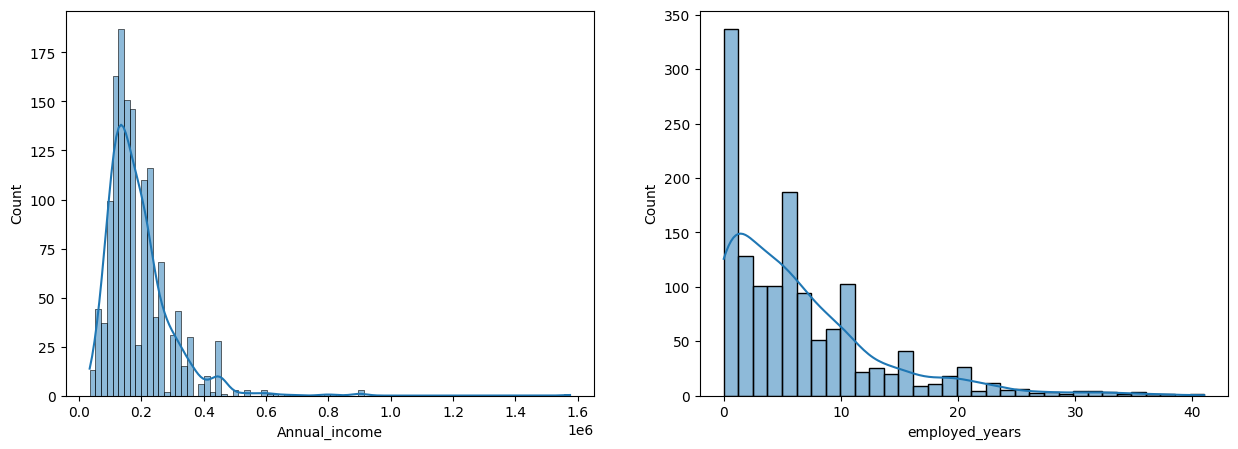

In [331]:
fig, ax = plt.subplots(1,2,figsize=(15, 5))
sns.histplot(x='Annual_income',ax=ax[0],data=ccc,kde=True)
sns.histplot(x='employed_years',ax=ax[1],data=ccc,kde=True)
plt.show()


In [332]:
# Doing log_tranformation
ccc['Annual_income_log']= np.log1p(ccc.Annual_income)
ccc['employed_years_log']=np.log1p(ccc.employed_years)

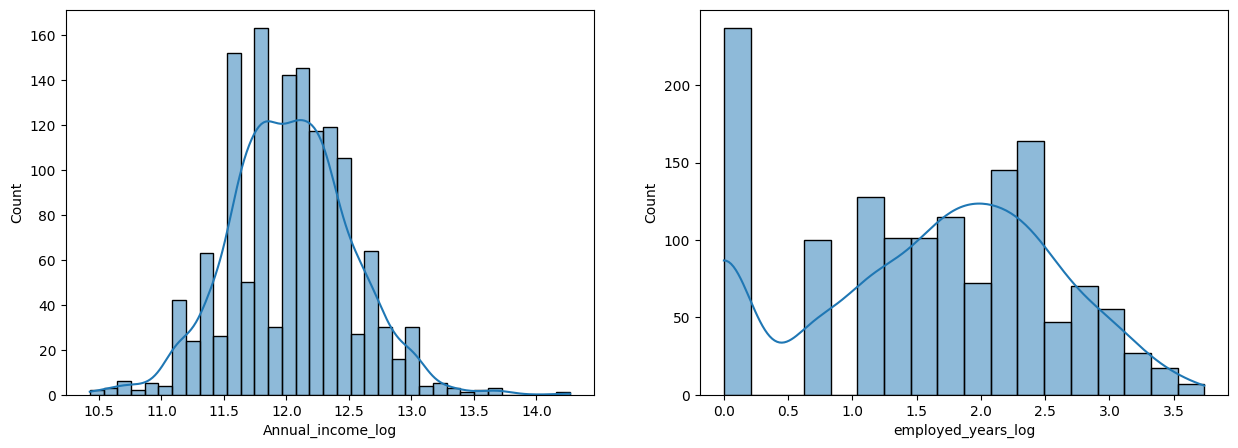

In [333]:
fig, ax = plt.subplots(1,2,figsize=(15, 5))
sns.histplot(x='Annual_income_log',ax=ax[0],data=ccc,kde=True)
sns.histplot(x='employed_years_log',ax=ax[1],data=ccc,kde=True)
plt.show()


Note that, after doing log transformation, Annual_income and employed_years have somewhat become normally distributed.

In [335]:
Num_cols=ccc[['Children','Family_Members','employed_years_log','Annual_income_log','age','label']]
Num_cols.skew(numeric_only=True)

Children              4.750842
Family_Members        2.332374
employed_years_log   -0.271026
Annual_income_log     0.135372
age                   0.180761
label                 2.691124
dtype: float64

In [336]:
# Dropping the columns
cccc=ccc.drop(columns=['Annual_income','employed_years'])

In [337]:
cccc

,Children,Education,Work_Phone,Phone,Email_ID,Family_Members,age,Gender_M,Car_Owner_Y,Property_Owner_Y,...,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff,Type_Occupation_other,label,Annual_income_log,employed_years_log
0,0.0,1.0,0.0,0.0,0.0,2.0,52.000000,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,12.100718,0.000000
1,0.0,1.0,1.0,1.0,0.0,2.0,38.000000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,12.660331,1.098612
2,0.0,1.0,1.0,1.0,0.0,2.0,38.000113,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,12.660331,1.098612
3,0.0,1.0,1.0,1.0,0.0,2.0,38.000000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,12.660328,1.098612
4,0.0,1.0,1.0,1.0,0.0,2.0,38.000000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,12.660331,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,1.0,4.0,0.0,1.0,0.0,3.0,31.000000,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,12.793862,2.397895
1382,0.0,1.0,0.0,0.0,0.0,2.0,33.000000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,12.308182,1.945910
1383,0.0,2.0,0.0,0.0,0.0,1.0,29.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,12.323860,1.609438
1384,0.0,4.0,1.0,1.0,0.0,2.0,42.000000,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,12.506181,1.098612


Seeing the relationship of variables with different variables using heatmap

<AxesSubplot: >

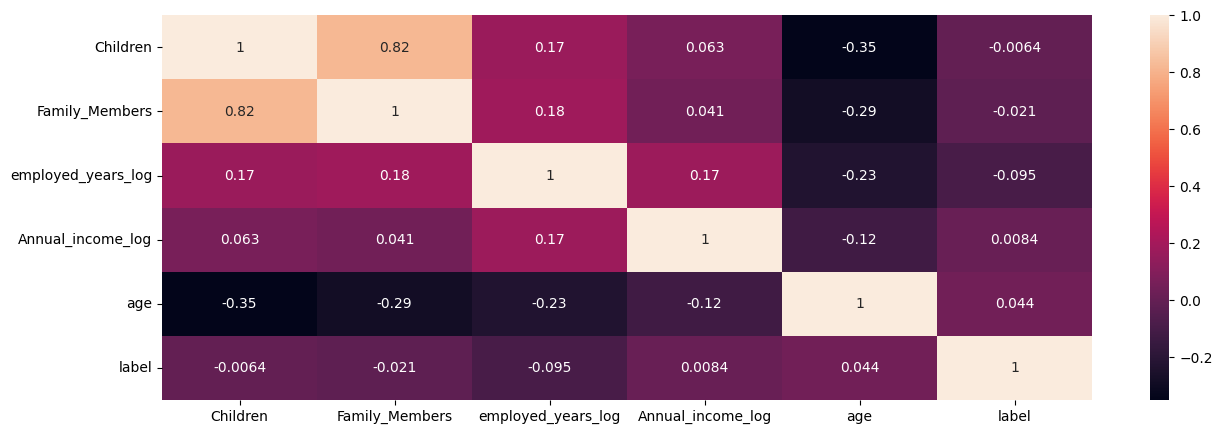

In [338]:
plt.figure(figsize=(15,5))
sns.heatmap(Num_cols.corr(method='spearman'),annot=True)

From heat map, we can clearly see that Family_Members and CHILDREN columns are very much similar as they give similar information. So, dropping CHILDREN Column makes sense

In [339]:
# Dropping CHILDREN Column
cccc=cccc.drop(columns=['Children'])

## Outlier removal

In [340]:
# box-plot
fig = px.box(cccc, y=['Family_Members','employed_years_log','Annual_income_log','age'], width=1400, height=400)
fig.show()

### There are many outliers present in the data. we need to handle them.
### so, here i am using the IQR method and capping the outliers to the upper and lower limits respectively.

In [341]:
q1=cccc.Family_Members.quantile(0.25)
q3=cccc.Family_Members.quantile(0.75)
IQR=q3-q1
lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR
cccc.Family_Members=np.where(cccc.Family_Members>upper_bound,upper_bound,cccc.Family_Members)

In [342]:
q1=cccc.Annual_income_log.quantile(0.25)
q3=cccc.Annual_income_log.quantile(0.75)
IQR=q3-q1
lower_bound=q1-1.5*IQR
upper_bound=q3+1.5*IQR
cccc.Annual_income_log=np.where(cccc.Annual_income_log>upper_bound,upper_bound,cccc.Annual_income_log)
cccc.Annual_income_log=np.where(cccc.Annual_income_log<lower_bound,lower_bound,cccc.Annual_income_log)

In [343]:
fig = px.box(cccc, y=['Family_Members','employed_years_log','Annual_income_log'], width=1400, height=400)
fig.show()

In [344]:
Num_cols=cccc[['Family_Members','employed_years_log','Annual_income_log','age','label']]
Num_cols.skew(numeric_only=True)

Family_Members        0.651608
employed_years_log   -0.271026
Annual_income_log     0.048953
age                   0.180761
label                 2.691124
dtype: float64

#### Even after removing outliers, columns are somewhat skewed.However, as per central limit theorem if sample size is more than 30 we are good to go.

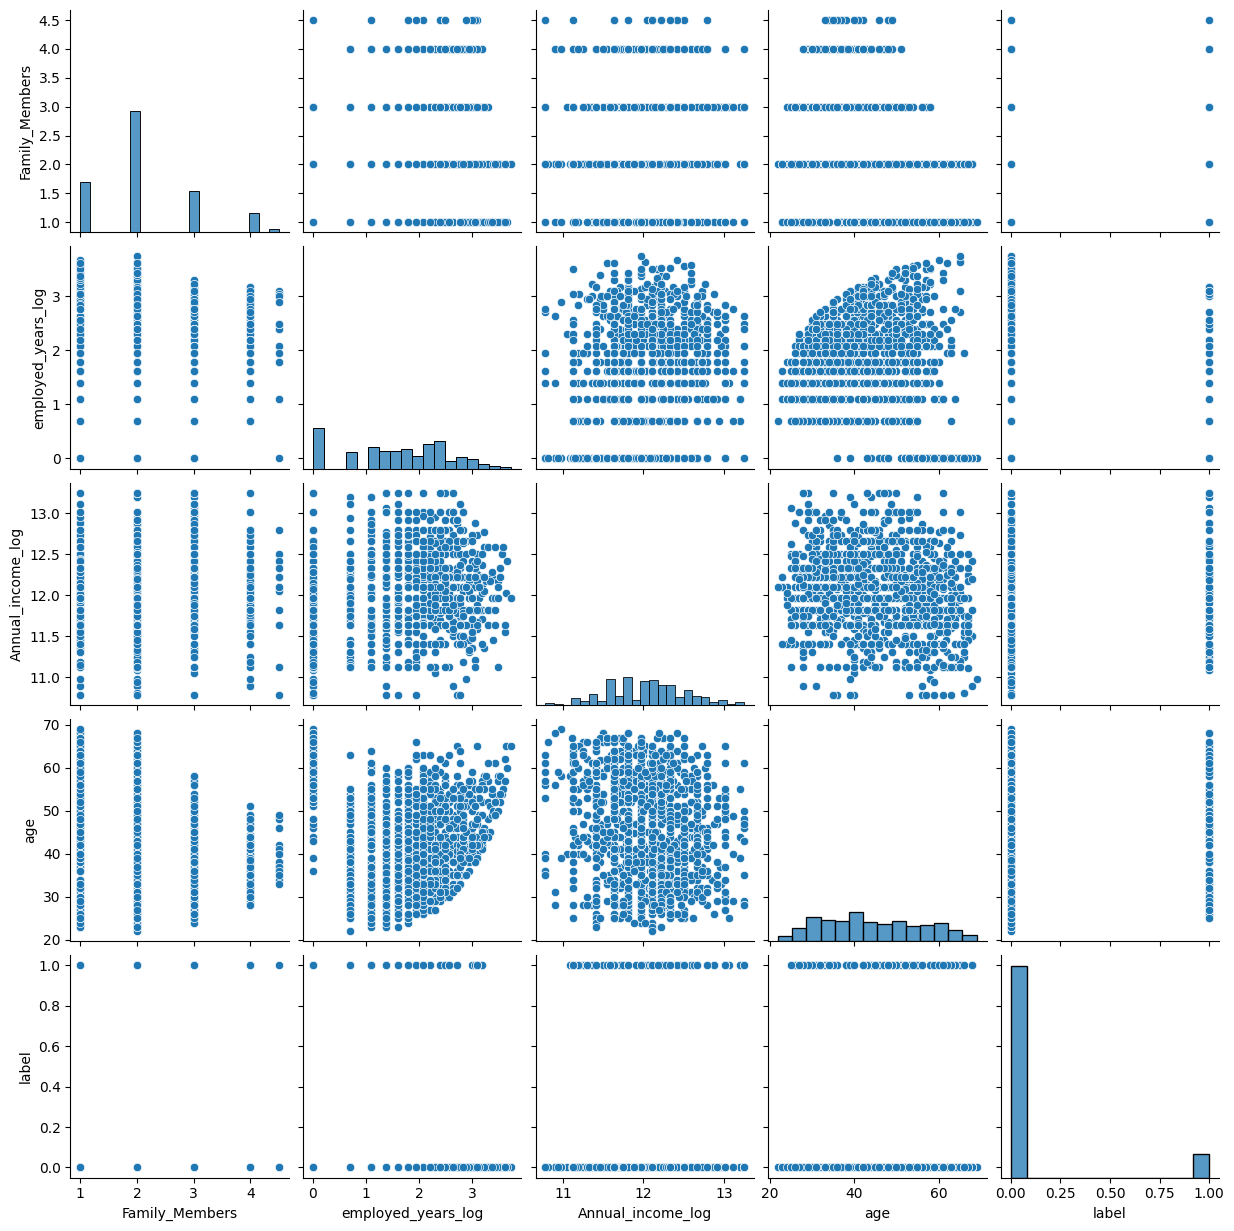

In [345]:
sns.pairplot(Num_cols)

### Checking the balance of the data by plotting the count of outcomes.

Count of class is:
 0    1249
1     137
Name: label, dtype: int64


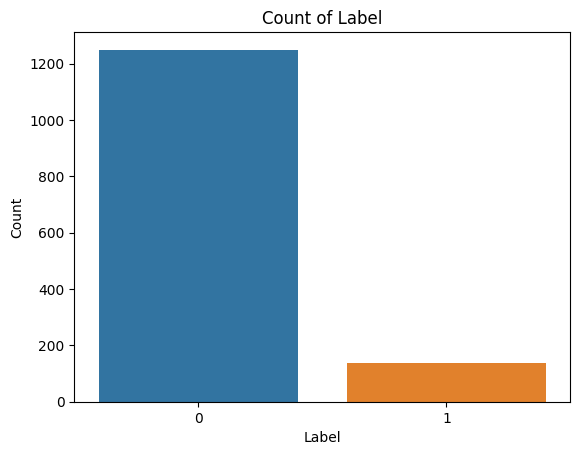

In [346]:
sns.countplot(x='label', data=cccc)
plt.title("Count of Label")
plt.xlabel('Label')
plt.ylabel("Count")
print("Count of class is:\n",cccc['label'].value_counts())

#### The above visualisation makes it clearly evident that our dataset is completely unbalanced.We will create fresh samples using **SMOTE (Synthetic Minority Oversampling Technique)** for the class "1" i.e. label that is underrepresented in our data.

#### But before using SMOTE, We need to convert categorical columns into numerical columns. So for that ,Here I am doing one hot encoding and ordinal encoding for respective columns

In [347]:
cccc_X = cccc.drop('label', axis=1)
cccc_y = cccc['label']
print(cccc_X.shape, cccc_y.shape)

(1386, 41) (1386,)


In [348]:
from imblearn.over_sampling import SMOTE

cccc_X__resampled, cccc_y_resampled = SMOTE(random_state=108).fit_resample(cccc_X, cccc_y)
print(cccc_X__resampled.shape, cccc_y_resampled.shape)

(2498, 41) (2498,)


### See our number of observations increased from 1334 to 2498 and are now balanced.

Count of class is:
 1    1249
0    1249
Name: label, dtype: int64


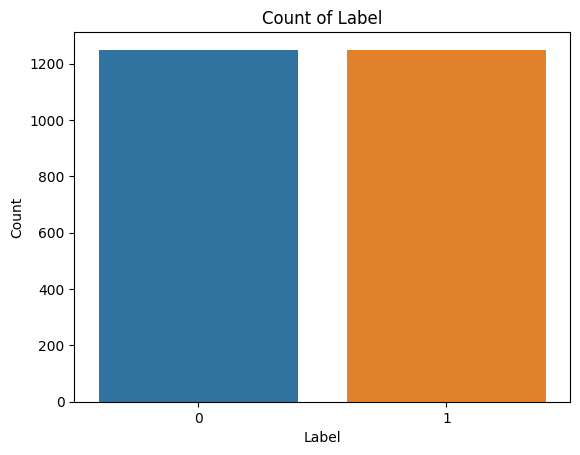

In [349]:
cccc = pd.concat([cccc_X__resampled, cccc_y_resampled], axis=1)

# now again checking the imbalance of the data.
sns.countplot(x='label', data=cccc)
plt.title("Count of Label")
plt.xlabel('Label')
plt.ylabel("Count")
print("Count of class is:\n",cccc['label'].value_counts())

In [350]:
cccc.shape

(2498, 42)

### Feature Importance


[1.90380015e-02 4.10843484e-02 6.51872490e-02 1.48972782e-02
 3.38704519e-02 2.37897054e-02 7.97866698e-02 6.73614072e-02
 6.64582681e-02 2.98721043e-02 3.98749916e-02 7.04329545e-02
 4.76515956e-02 1.40494663e-02 5.28828366e-02 9.36118796e-03
 2.04299484e-02 2.67254475e-02 6.77199748e-04 5.39512525e-03
 2.98619490e-02 2.12583727e-03 5.47792101e-03 1.66548837e-02
 1.39798693e-02 2.55496611e-05 9.35022834e-03 3.44763343e-03
 3.19105571e-02 4.49176858e-03 1.49229615e-02 5.09196623e-03
 3.96152797e-03 1.58427401e-05 1.95923461e-02 4.92139436e-04
 1.27637000e-02 1.16135923e-03 2.85439922e-02 1.63325606e-02
 5.09691692e-02]


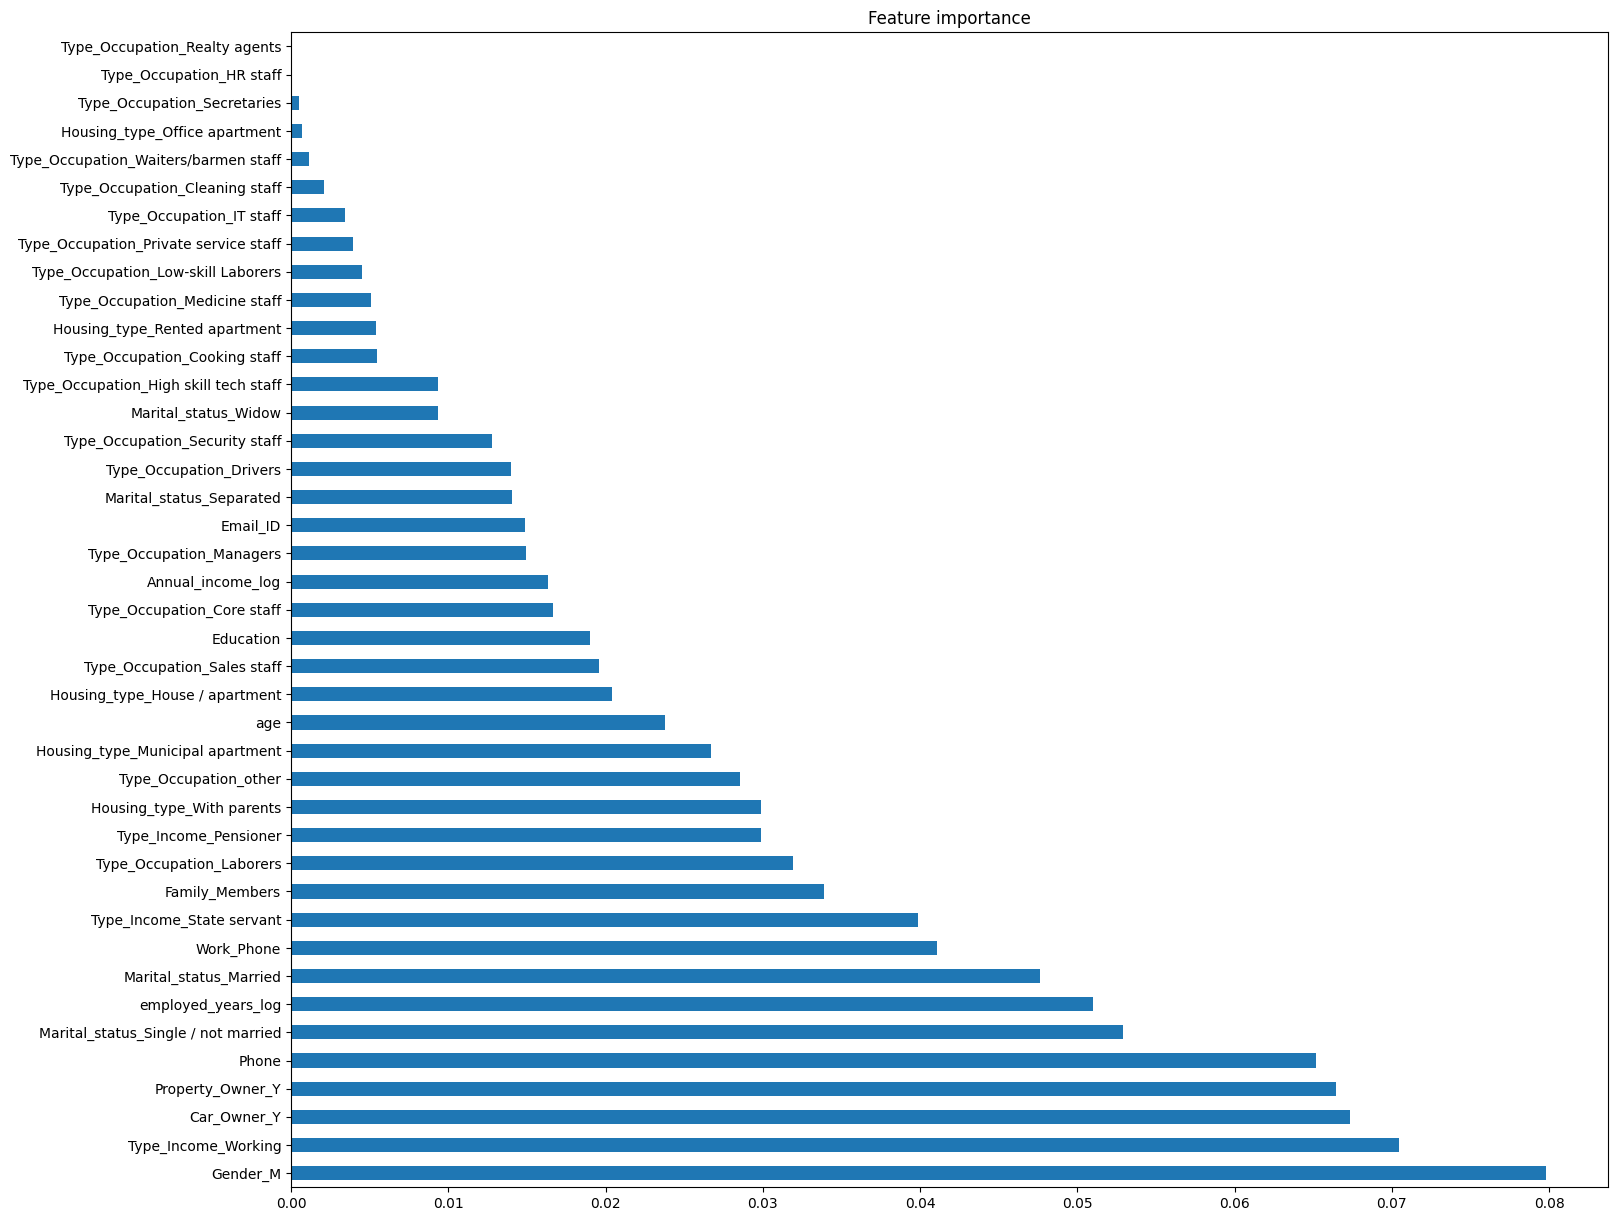

In [351]:
x = cccc.drop(columns=['label'])  #independent columns
y = cccc['label']    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=500,max_depth=8)
model.fit(x,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(44).plot(kind='barh',figsize=(17,15))
plt.title("Feature importance")
plt.show()

# Model building

We will use- 
1- Logistic Regression,
2- KNN 
3- Decision Tree, 
4- Random Forest 
5- SVM.

In [353]:
# Train-Test Split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x, y,test_size=0.20, random_state =101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1998, 41)
(500, 41)
(1998,)
(500,)


Using MinMax Scaler to standardize the data

In [354]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.transform(x_test)

# converting back into dataframe format
x_train_norm=pd.DataFrame(x_train_norm,columns=x_train.columns)
x_test_norm=pd.DataFrame(x_test_norm,columns=x_test.columns)
x_train_norm
x_test_norm

,Education,Work_Phone,Phone,Email_ID,Family_Members,age,Gender_M,Car_Owner_Y,Property_Owner_Y,Type_Income_Pensioner,...,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff,Type_Occupation_other,Annual_income_log,employed_years_log
0,1.00,0.0,0.0,0.0,0.000000,0.085110,1.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.849724,0.293930
1,1.00,1.0,1.0,0.0,0.285714,0.659574,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.343775,0.758016
2,0.25,0.0,0.0,1.0,0.000000,0.914894,0.0,0.0,1.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.136523,0.000000
3,1.00,0.0,0.0,0.0,0.285714,0.553191,1.0,1.0,0.690575,0.0,...,0.0,0.0,0.0,0.0,0.0,0.309425,0.0,0.0,0.627131,0.498965
4,1.00,0.0,0.0,0.0,0.571429,0.234043,0.0,0.0,1.000000,0.0,...,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.534466,0.616048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.25,0.0,1.0,0.0,0.000000,0.425532,1.0,0.0,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.698972,0.616048
496,0.25,0.0,0.0,0.0,0.285714,0.808511,1.0,1.0,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.162708,0.293930
497,1.00,0.0,0.0,0.0,0.285714,0.783389,0.0,0.0,0.180722,1.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.364132,0.000000
498,1.00,0.0,1.0,0.0,0.285714,0.936170,0.0,0.0,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.389755,0.520621


In [355]:
# Importing ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

## Importing accuracy metrics
from sklearn.metrics import accuracy_score, average_precision_score, f1_score, confusion_matrix,classification_report, auc, roc_curve, roc_auc_score, precision_recall_curve

In [356]:
# Making lists as to compare the models later
models = []
model_accuracy = []
model_f1 = []
model_auc = []

In [357]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
svm=SVC()

model=[lr,knn,dt,rf,svm]

model_names = ['LogisticRegression','KNN','Decision Tree','Random Forest','SVM']

for i in range(len(model)):    
    model[i].fit(x_train_norm, y_train)
    y_pred = model[i].predict(x_test_norm)
    print(model_names[i])
    print('accuracy score =',accuracy_score(y_test, y_pred))
    print('AUC =',roc_auc_score(y_test, y_pred))
    print('F1_score =',(f1_score(y_test, y_pred)))
    print("================================================================")

LogisticRegression
accuracy score = 0.608
AUC = 0.6080000000000001
F1_score = 0.6216216216216216
KNN
accuracy score = 0.816
AUC = 0.816
F1_score = 0.8391608391608391
Decision Tree
accuracy score = 0.878
AUC = 0.878
F1_score = 0.8796844181459568
Random Forest
accuracy score = 0.954
AUC = 0.954
F1_score = 0.9523809523809524
SVM
accuracy score = 0.868
AUC = 0.868
F1_score = 0.868


## Using GridsearchCV for hyperparameter tuning to get more accurate results.

In [358]:
from sklearn.model_selection import GridSearchCV

In [359]:
# Hyperparameter tuning.
lrp= {'solver' :['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
knnp = {'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'n_neighbors':np.arange(1,100,2),'weights':['uniform', 'distance']}
dtp = {'criterion' : ["gini", "entropy", "log_loss"],'max_depth': [3,5,7,9,11,None], 'min_samples_split': [2, 3, 4],'max_features':[0.5,0.75,1]}
rfp = {'criterion': ["gini", "entropy", "log_loss"], 'max_depth':[1,3,5,7,9],'max_features':["sqrt", "log2", None]}
svmp= {'C': [1, 10, 100, 1000], 'kernel': ['linear']},{'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}

parameter=[lrp,knnp,dtp,rfp,svmp]
name=['Logistic Regression','KNN model','Decision tree model','Random Forest Model','Support vector machine']

for i in range(len(model)):
    Grid=GridSearchCV(estimator=model[i], param_grid=parameter[i],n_jobs=-1, cv=5, scoring='roc_auc')
    Grid.fit(x_train_norm,y_train)
    y_pred = Grid.predict(x_test_norm)
    print(name[i])
    print("Best Parameters: ", Grid.best_params_)
    print("Best Score: ", Grid.best_score_)
    print("================================================")

Logistic Regression
Best Parameters:  {'solver': 'liblinear'}
Best Score:  0.6752400879396985
KNN model
Best Parameters:  {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}
Best Score:  0.9285137437185929
Decision tree model
Best Parameters:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 0.5, 'min_samples_split': 3}
Best Score:  0.9269981281407036
Random Forest Model
Best Parameters:  {'criterion': 'gini', 'max_depth': 9, 'max_features': 'log2'}
Best Score:  0.977919811557789
Support vector machine
Best Parameters:  {'C': 10, 'gamma': 0.6, 'kernel': 'rbf'}
Best Score:  0.9840430025125627


In [360]:
# Now getting best parameters
lr=LogisticRegression( solver = 'liblinear')
knn=KNeighborsClassifier(algorithm = 'auto', n_neighbors = 7, weights = 'distance')
dt=DecisionTreeClassifier(criterion = 'entropy', max_depth = 11, max_features = 0.75, min_samples_split = 4)
rf=RandomForestClassifier(criterion = 'gini', max_depth = 9, max_features = 'sqrt')
svm=SVC(C = 10, gamma = 0.6, kernel = 'rbf', probability=True)

model=[lr,knn,dt,rf,svm]
name=['Logistic Regression','KNN model','Decision tree model','Random Forest Model','Support vector machine']

for i in range(len(model)):
    model[i].fit(x_train_norm, y_train)
    y_pred = model[i].predict(x_test_norm)
    print(name[i])
    print('accuracy score =',accuracy_score(y_test, y_pred))
    print('AUC =',roc_auc_score(y_test, y_pred))
    print('F1_score =',(f1_score(y_test, y_pred)))
    # saving the results
    models.append(name[i])
    model_accuracy.append(accuracy_score(y_test, y_pred))
    model_auc.append(roc_auc_score(y_test, y_pred))
    model_f1.append(np.sqrt(f1_score(y_test, y_pred)))
    print("================================================")

Logistic Regression
accuracy score = 0.608
AUC = 0.6080000000000001
F1_score = 0.6216216216216216
KNN model
accuracy score = 0.822
AUC = 0.822
F1_score = 0.8452173913043478
Decision tree model
accuracy score = 0.874
AUC = 0.8739999999999999
F1_score = 0.8684759916492694
Random Forest Model
accuracy score = 0.942
AUC = 0.942
F1_score = 0.9399585921325052
Support vector machine
accuracy score = 0.946
AUC = 0.9460000000000001
F1_score = 0.9473684210526315


# Now ploting ROC Curve using best parameters for each models

Logistic Regression
AUC Score: 0.649
KNN model
AUC Score: 0.939
Decision tree model
AUC Score: 0.930
Random Forest Model
AUC Score: 0.980
Support vector machine
AUC Score: 0.984


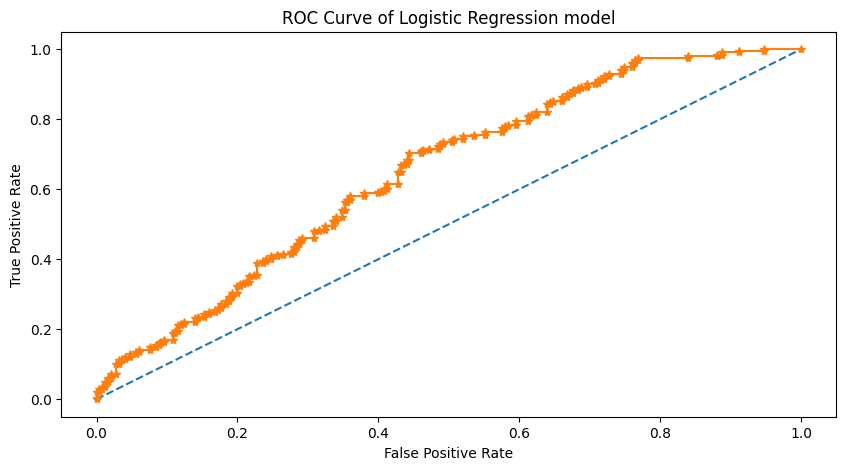

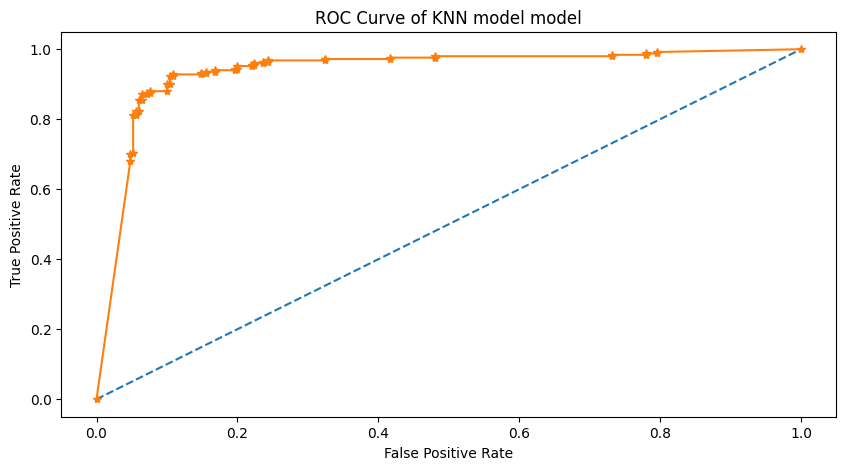

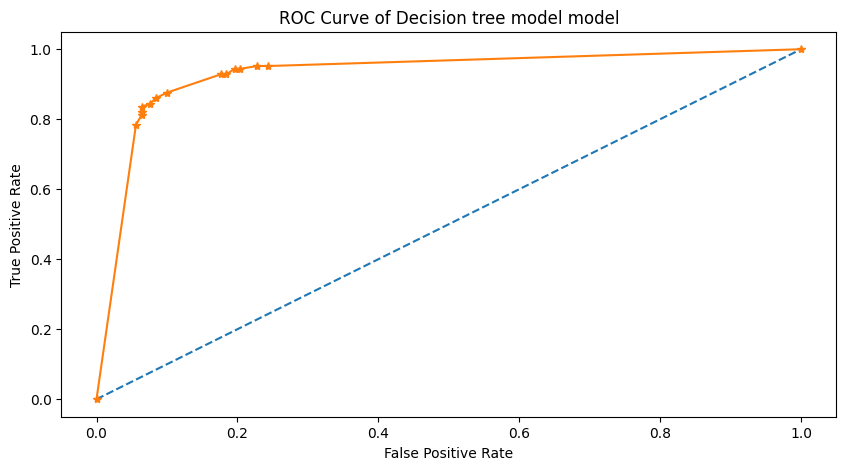

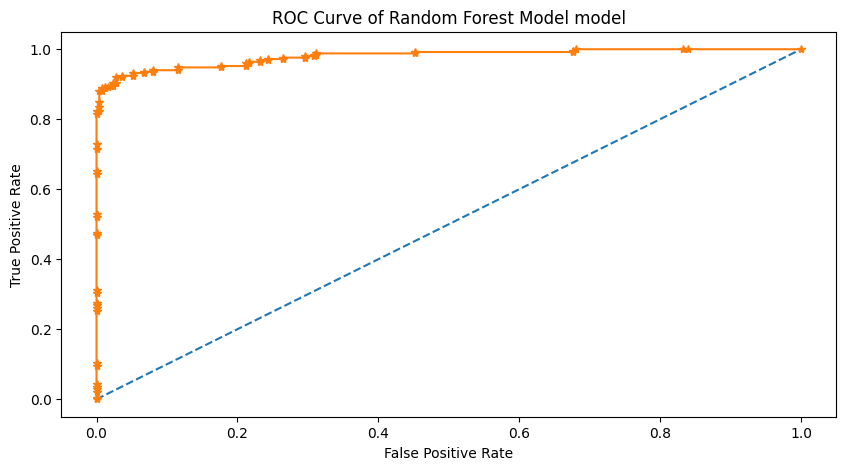

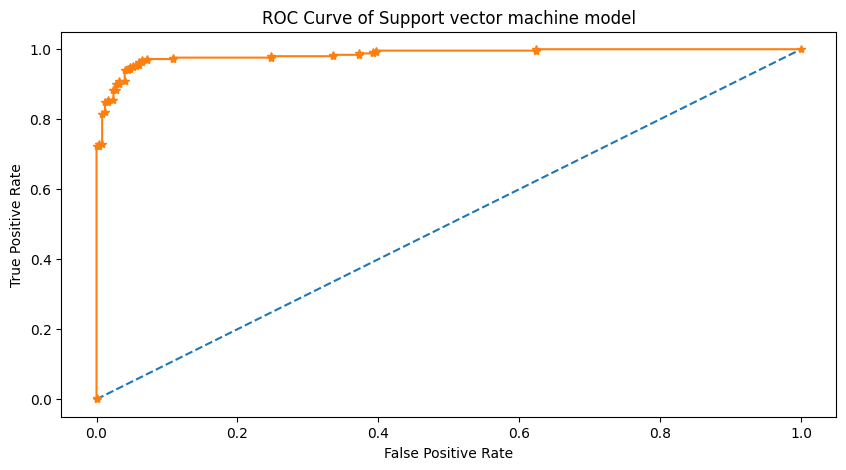

In [361]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)
for i in range(len(model)):
    model[i].fit(x_train_norm, y_train)
    plt.figure(figsize=(10,5))                       
    prob = model[i].predict_proba(x_test_norm)               
    prob = prob[:, 1]                              #probabilities for the positive outcome only
    auc = roc_auc_score(y_test, prob)       
    fpr, tpr, thresholds = roc_curve(y_test, prob)      
    print(name[i])
    print('AUC Score: %.3f' %auc)
    plt.plot([0, 1], [0, 1], linestyle='--')         
    plt.plot(fpr, tpr, marker='*')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve of {name[i]} model")
    print("================================================")

# Now we will check the best performing Model

In [362]:
models_table = pd.DataFrame(zip(models,model_accuracy,model_f1,model_auc), columns = ['model','accuracy','f1_score','auc'])
models_table

,model,accuracy,f1_score,auc
0,Logistic Regression,0.608,0.788430,0.608
1,KNN model,0.822,0.919357,0.822
2,Decision tree model,0.874,0.931921,0.874
3,Random Forest Model,0.942,0.969515,0.942
4,Support vector machine,0.946,0.973329,0.946


Text(0.5, 1.0, 'Comparison of Different Classification Algorithms')

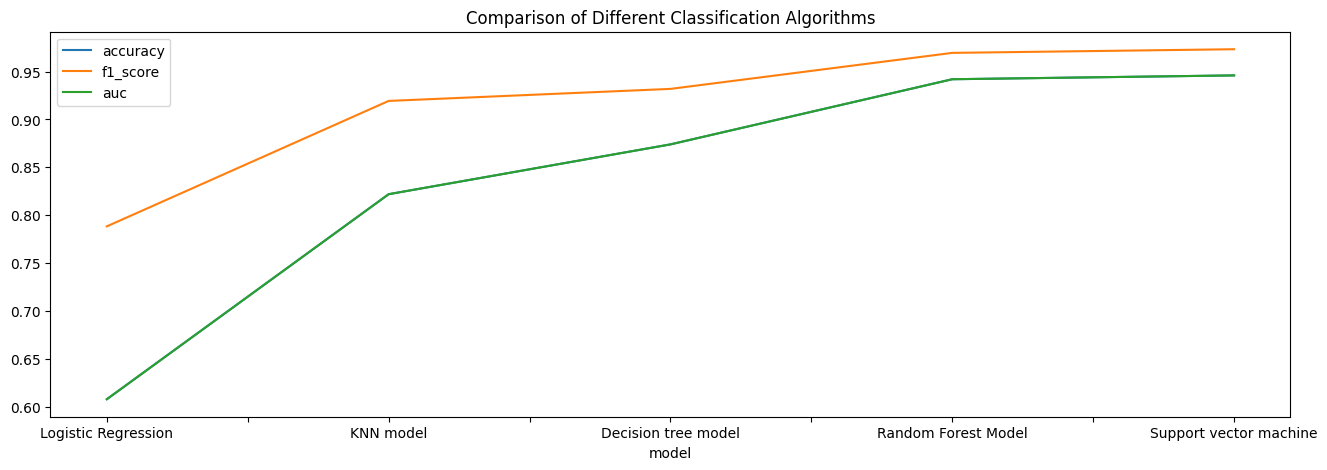

In [363]:
models_table = models_table.set_index('model')
models_table.plot(figsize=(16,5))
plt.title("Comparison of Different Classification Algorithms")

# Among all models, Support vector machine has given best accuracy and f1_score. Therefore we will build final model using SVM.

In [364]:
final_model = svm
y_final_pred=final_model.predict(x_test_norm)

In [365]:
c_report = classification_report(y_test, y_final_pred)
print(c_report)

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       250
           1       0.92      0.97      0.95       250

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500



In [366]:
confusion = confusion_matrix(y_test, y_final_pred)
print("Confusion Matrix:\n", confusion)

Confusion Matrix:
 [[230  20]
 [  7 243]]


In [367]:
T_P = confusion[1,1]            # True positive 
T_N = confusion[0,0]            # True negatives
F_P = confusion[0,1]            # False positives
F_N = confusion[1,0]            # False negatives

print('True Positve :',T_P)
print('True Negative :',T_N)
print('False Positive :',F_P)
print('False Negative :',F_N)

True Positve : 243
True Negative : 230
False Positive : 20
False Negative : 7


In [368]:
Accuracy = (T_P+T_N)/(T_P+T_N+F_P+F_N)
Precision = T_P/(T_P+F_P)
Sensitivity = T_P/(T_P+F_N)                     
Specificity = T_N/(T_N+F_P)

print("Accuracy: %.3f"%Accuracy)
print("Precision: %.3f"%Precision)
print("Sensitivity: %.3f"%Sensitivity)
print("Specificity: %.3f"%Specificity)

Accuracy: 0.946
Precision: 0.924
Sensitivity: 0.972
Specificity: 0.920


In [369]:
final_values = pd.DataFrame({'Actual Outcome': y_test, 'Predicted Outcome': y_final_pred})
final_values.sample(30)

,Actual Outcome,Predicted Outcome
2056,1,1
668,0,0
1082,0,0
354,0,1
602,0,0
1212,0,0
2405,1,1
1842,1,1
1614,1,1
719,0,0


### Conclusion